In [4]:
#%cd /data/bruingjde/on-going/SNAM2021-code/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn.model_selection
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import seaborn as sns
from tqdm.auto import tqdm

networks = [4,8,9,10,11,18,20,21,24] #16 weggelaten tijdelijk
    
def read_file(path):
    extension = path[2:].split('.')[1]
    print(path)
    if extension == 'int':
        with open(path) as file:
            return int(file.read())
    elif extension == 'float':
        with open(path) as file:
            return float(file.read())
    else:
        raise Exception(f'{extension=}')

def get_stats(network: int):
    properties_dir = f'/data/s1620444/{network:02}/properties/'
    properties = {prop.split('.')[0]: read_file(properties_dir + prop) 
                  for prop 
                  in ['edges.int', 'connected_pairs.int', 'II-A_LogisticRegression.float', 'II-B_LogisticRegression.float']}
    
    return {
        '\\bar e': properties['edges'] / properties['connected_pairs'],
        'A': properties['II-A_LogisticRegression'],
        'B': properties['II-B_LogisticRegression'],
        'Domain': pd.read_json('../networks.jsonl', lines=True).set_index('index').loc[network, 'category']
    }

In [6]:
data = pd.DataFrame({network: get_stats(network) for network in networks}).T.astype({'\\bar e': float, 'A': float, 'B': float}) #.loc[lambda x: x['\\bar e'] > 2]

/data/s1620444/04/properties/edges.int
/data/s1620444/04/properties/connected_pairs.int
/data/s1620444/04/properties/II-A_LogisticRegression.float
/data/s1620444/04/properties/II-B_LogisticRegression.float
/data/s1620444/08/properties/edges.int
/data/s1620444/08/properties/connected_pairs.int
/data/s1620444/08/properties/II-A_LogisticRegression.float
/data/s1620444/08/properties/II-B_LogisticRegression.float
/data/s1620444/09/properties/edges.int
/data/s1620444/09/properties/connected_pairs.int
/data/s1620444/09/properties/II-A_LogisticRegression.float
/data/s1620444/09/properties/II-B_LogisticRegression.float
/data/s1620444/10/properties/edges.int
/data/s1620444/10/properties/connected_pairs.int
/data/s1620444/10/properties/II-A_LogisticRegression.float
/data/s1620444/10/properties/II-B_LogisticRegression.float
/data/s1620444/11/properties/edges.int
/data/s1620444/11/properties/connected_pairs.int
/data/s1620444/11/properties/II-A_LogisticRegression.float
/data/s1620444/11/properties/

In [7]:
data

,\bar e,A,B,Domain
4,1.000000,0.769349,0.768443,Social
8,1.000000,0.769349,0.768443,Social
9,1.012307,0.971939,0.973323,Social
10,1.118615,0.965303,0.959477,Social
11,1.009547,0.866315,0.858069,Information
18,1.746068,0.960361,0.958571,Social
20,1.722823,0.941888,0.942082,Social
21,1.050273,0.837493,0.835273,Information
24,1.019506,0.916989,0.917304,Information


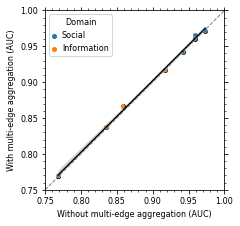

In [8]:
fontsize=8
rc = {
  'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,3.3), 
  'axes.titlesize': fontsize, 
  'axes.labelsize': fontsize, 
  'xtick.labelsize': fontsize, 
  'ytick.labelsize': fontsize, 
  'legend.fontsize': fontsize, 
  'legend.title_fontsize': fontsize,
  'lines.linewidth': 1,
  'lines.markersize': 4,
  'legend.handlelength': .4,
  'font.family': 'sans-serif',
  'font.sans-serif': 'Helvetica',
  'savefig.transparent': True
}

with plt.rc_context(rc):
    ax = sns.regplot(data=data, x='B', y='A', color='black')
    ax.axis('scaled')
    ax = sns.scatterplot(data=data, x='B', y='A', hue='Domain', ax=ax)
    ax.axline((0,0), (1,1), ls='--', c='grey')
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.05))
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.05))
    ax.set_xlabel('Without multi-edge aggregation (AUC)')
    ax.set_ylabel('With multi-edge aggregation (AUC)')
    ax.set_xlim(.75, 1)
    ax.set_ylim(.75, 1)
    ax.legend(title='Domain')